The objective of the following article is to obtain a step-by-step guide on building the `Croston SBA Model` using `CrostonSBA` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Croston SBA Model](#2)
3.	[Installing Statsforecast](#3)
4.	[Loading libraries and data](#4)
5.	[Explore Data with the plot method](#5)
6.	[Split the data into training and testing](#6)
7.	[Implementation of Croston SBA Model with StatsForecast](#7)
8.	[Evaluate the model’s performance](#8)
9.	[Evaluate the model](#9)
10. [References](#10)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)

The Croston model is a method used to forecast time series with intermittent demand data, that is, data that has many periods of zero demand and only a few periods of non-zero demand. Croston's approach was originally proposed by J.D. Croston in 1972. Subsequently, Syntetos and Boylan proposed an improvement to the original model in 2001, known as the Croston-SBA (Syntetos and Boylan Approximation).

The Croston-SBA model is based on the assumption that intermittent demand follows a binomial process. Instead of directly modeling demand, the focus is on modeling the intervals between demand periods. The model has two main components: one to model the intervals between demand periods (which are assumed to follow a Poisson distribution), and another to model the demands when they occur.

It is important to note that the Croston-SBA model assumes that the intervals between the non-zero demand periods are independent and follow a Poisson distribution. However, this model is an approximation and may not work well in all situations. It is advisable to evaluate its performance on historical data before using it in practice.

# **2 Croston SBA method** 

The formula of SBA is very similar to the original Croston’s method, however, it apply a correction factor which reduce the error in the final estimate result. 

if $Z_t=0$ then 

$$Z'_t=Z'_{t-1}$$

$$P'_t=P'_{t-1}$$

Otherwise

$$Z'_t=\alpha Z_t +(1-\alpha)Z'_{t-1}$$

$$P'_t=\alpha P_t +(1- \alpha) P'_{t-1}\ where \ 0<\alpha < 1$$

$$Y'_t=(1-\frac{\alpha}{2}) \frac{Z'_t}{P'_t}$$

where 

- $Y'_t:$ Average demand per period
- $Z_t:$ Actual demand at period $t$
- $Z'_t:$ Time between two positive demand
- $P:$ Demand size forecast for next period
- $P'_t:$ Forecast of demand interval
- $\alpha:$ Smoothing constant

Note: In Croston’s method, result often will present a considerable positive bias, whereas in SBA the bias is reduced, and sometimes will appear slightly negative bias.


## **2.1 Some properties of the Optimized Croston Model**



# **3. Installing Statsforecast** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

* using pip:

`pip install statsforecast`

* using with conda:

`conda install -c conda-forge statsforecast`



¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **4. Loading libraries and data** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/intermittend_demand2")

df.head()

date  sales
0  2022-01-01 00:00:00      0
1  2022-01-01 01:00:00     10
2  2022-01-01 02:00:00      0
3  2022-01-01 03:00:00      0
4  2022-01-01 04:00:00    100

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

ds    y unique_id
0  2022-01-01 00:00:00    0         1
1  2022-01-01 01:00:00   10         1
2  2022-01-01 02:00:00    0         1
3  2022-01-01 03:00:00    0         1
4  2022-01-01 04:00:00  100         1

In [5]:
df.tail()

ds    y unique_id
9995  2023-02-21 11:00:00    0         1
9996  2023-02-21 12:00:00  200         1
9997  2023-02-21 13:00:00   60         1
9998  2023-02-21 14:00:00   20         1
9999  2023-02-21 15:00:00   20         1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         10000 non-null  object
 1   y          10000 non-null  int64 
 2   unique_id  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [7]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

In [8]:
#df["y"] = df["y"].astype(float).astype("int64")

#df = df.asfreq('H')
df = df.sort_values("ds")

# **5. Explore Data with the plot method** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

In [9]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

## **5.1 Autocorrelation plots**

Autocorrelation (ACF) and partial autocorrelation (PACF) plots are statistical tools used to analyze time series. ACF charts show the correlation between the values of a time series and their lagged values, while PACF charts show the correlation between the values of a time series and their lagged values, after the effect of previous lagged values has been removed.

ACF and PACF charts can be used to identify the structure of a time series, which can be helpful in choosing a suitable model for the time series. For example, if the ACF chart shows a repeating peak and valley pattern, this indicates that the time series is stationary, meaning that it has the same statistical properties over time. If the PACF chart shows a pattern of rapidly decreasing spikes, this indicates that the time series is invertible, meaning it can be reversed to get a stationary time series.

The importance of the ACF and PACF charts is that they can help analysts better understand the structure of a time series. This understanding can be helpful in choosing a suitable model for the time series, which can improve the ability to predict future values of the time series.

To analyze ACF and PACF charts:

* Look for patterns in charts. Common patterns include repeating peaks and valleys, sawtooth patterns, and plateau patterns.
* Compare ACF and PACF charts. The PACF chart generally has fewer spikes than the ACF chart.
* Consider the length of the time series. ACF and PACF charts for longer time series will have more spikes.
* Use a confidence interval. The ACF and PACF plots also show confidence intervals for the autocorrelation values. If an autocorrelation value is outside the confidence interval, it is likely to be significant.

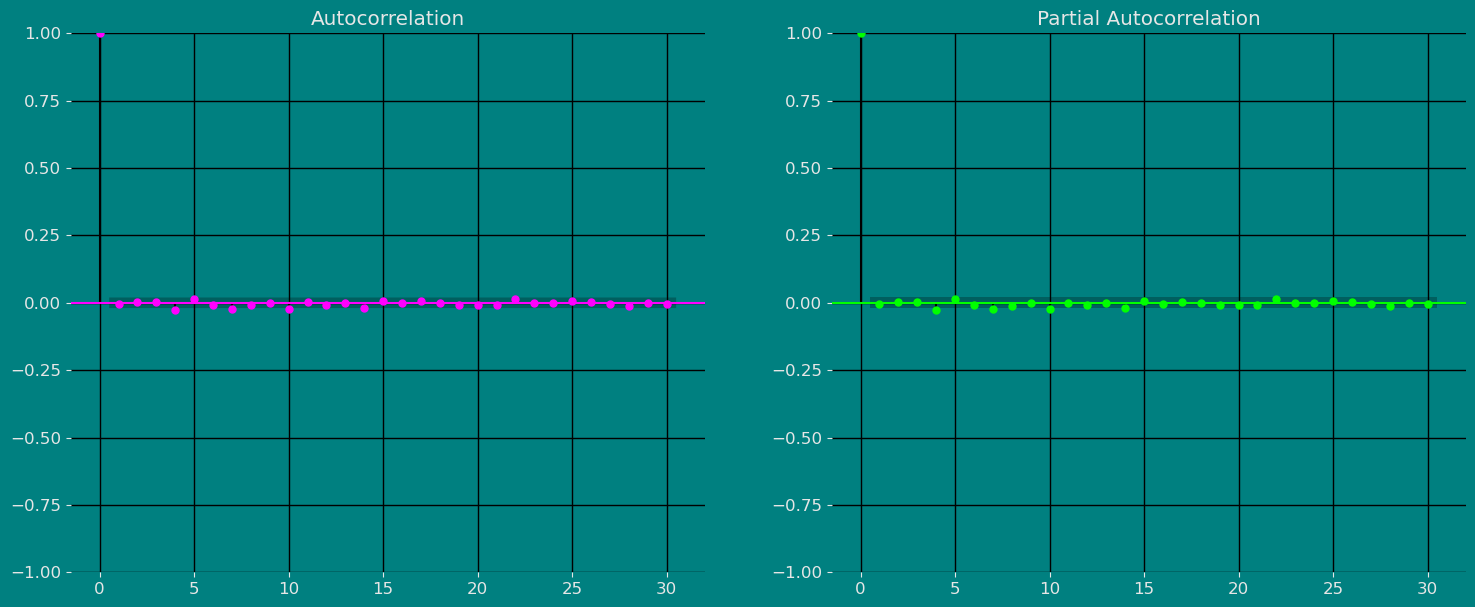

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

## **5.2 Decomposition of the time series**

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* multiplicative

### **Additive time series**

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

### **Multiplicative time series**

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

In [11]:
from plotly.subplots import make_subplots

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.tools as tls

def plotSeasonalDecompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
    title="Seasonal Decomposition"):

    """
    Plot time series decomposition
    :param x: Time series.
    
    See documentation of the remaining models here - 
        https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
     
    Example - 
    import pandas as pd
    from datetime import datetime
    import PlotTimeSeries
    s = pd.DataFrame(list(range(1, 11))*10,
                    index=pd.date_range(start=datetime(2010,  1, 1), periods=100))
    fig = PlotTimeSeries.plotSeasonalDecompose(s)
    fig.show()
    """

    result = seasonal_decompose(
            x, model=model, filt=filt, period=period,
            two_sided=two_sided, extrapolate_trend=extrapolate_trend)
    fig = make_subplots(
            rows=4, cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"])
    
    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.observed, mode='lines'),
                row=1, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.trend.index, y=result.trend, mode='lines'),
                row=2, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines'),
                row=3, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.resid.index, y=result.resid, mode='lines'),
                row=4, col=1,
            )

    return fig

In [13]:
plotSeasonalDecompose(
    df["y"],
    model="additive",
    period=24,
    
    title="Seasonal Decomposition")

# **6. Split the data into training and testing** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `Croston SBA Model`.
2. Data to test our model

For the test data we will use the last 500 Hours to test and evaluate the performance of our model.

In [14]:
train = df[df.ds<='2023-01-31 19:00:00'] 
test = df[df.ds>'2023-01-31 19:00:00'] 

In [15]:
train.shape, test.shape

((9500, 3), (500, 3))

Now let's plot the training data and the test data.

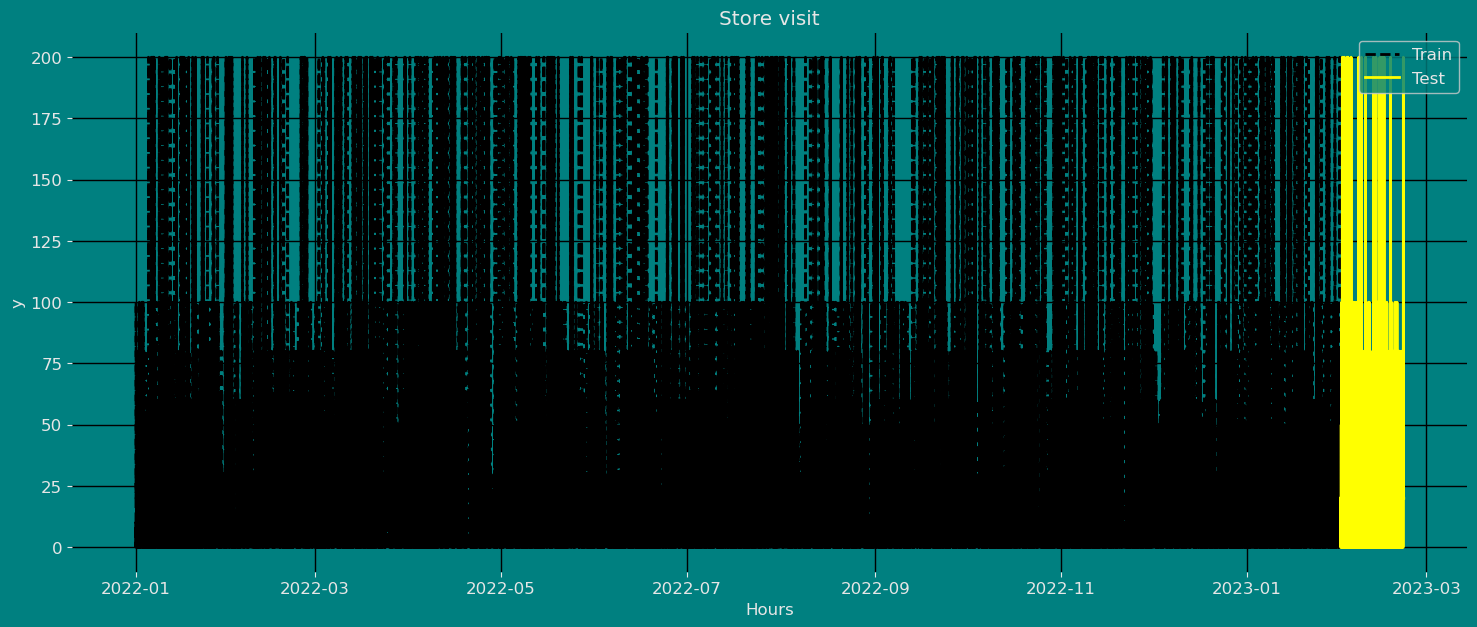

In [16]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color="yellow")
plt.title("Store visit");
plt.xlabel("Hours")
plt.show()

# **7. Implementation of `Croston SBA Model` with StatsForecast** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

To also know more about the parameters of the functions of the `Croston SBA Model` you can see it [here](https://nixtla.github.io/statsforecast/src/core/models.html#crostonsba).

## **7.1 Load libraries**

In [17]:
from statsforecast import StatsForecast
from statsforecast.models import CrostonSBA

In [18]:
?CrostonSBA

Init signature: CrostonSBA(alias: str = 'CrostonSBA')
Docstring:      <no docstring>
Init docstring:
CrostonSBA model.

A method to forecast time series that exhibit intermittent demand.
It decomposes the original time series into a non-zero demand size $z_t$ and
inter-demand intervals $p_t$. Then the forecast is given by:
$$ \hat{y}_t = \frac{\hat{z}_t}{\hat{p}_t} $$

A variation of the classic Croston's method that uses a debiasing factor, so that the
forecast is given by:
$$ \hat{y}_t = 0.95  \frac{\hat{z}_t}{\hat{p}_t} $$

**References:**<br>
[Croston, J. D. (1972). Forecasting and stock control for intermittent demands. Journal of the Operational Research Society, 23(3), 289-303.](https://link.springer.com/article/10.1057/jors.1972.50).

Parameters
----------
alias : str
    Custom name of the model.
File:           ~/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/models.py
Type:           type
Subclasses:     

## **7.2 Building Model**
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/) by the master, Rob Hyndmann, can be useful for `season_length`.


In [19]:
season_length = 24 # Hourly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [CrostonSBA()]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [20]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df=df,
                   models=models,
                   freq='H', 
                   n_jobs=-1)

## **7.3 Fit the Model**

In [21]:
# fit the models
sf.fit()

StatsForecast(models=[CrostonSBA])

Let's see the results of our `Croston SBA Model`. We can observe it with the following instruction:

In [22]:
result=sf.fitted_[0,0].model_
result

{'mean': array([22.426361], dtype=float32)}

## **7.4 Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 500 hours ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [25]:
# Prediction
Y_hat = sf.forecast(horizon)

Y_hat

ds  CrostonSBA
unique_id                                
1         2023-02-21 16:00:00   22.426361
1         2023-02-21 17:00:00   22.426361
1         2023-02-21 18:00:00   22.426361
1         2023-02-21 19:00:00   22.426361
1         2023-02-21 20:00:00   22.426361
...                       ...         ...
1         2023-03-14 07:00:00   22.426361
1         2023-03-14 08:00:00   22.426361
1         2023-03-14 09:00:00   22.426361
1         2023-03-14 10:00:00   22.426361
1         2023-03-14 11:00:00   22.426361

[500 rows x 2 columns]

In [26]:
Y_hat=Y_hat.reset_index()
Y_hat

unique_id                  ds  CrostonSBA
0           1 2023-02-21 16:00:00   22.426361
1           1 2023-02-21 17:00:00   22.426361
2           1 2023-02-21 18:00:00   22.426361
3           1 2023-02-21 19:00:00   22.426361
4           1 2023-02-21 20:00:00   22.426361
..        ...                 ...         ...
495         1 2023-03-14 07:00:00   22.426361
496         1 2023-03-14 08:00:00   22.426361
497         1 2023-03-14 09:00:00   22.426361
498         1 2023-03-14 10:00:00   22.426361
499         1 2023-03-14 11:00:00   22.426361

[500 rows x 3 columns]

In [27]:
# Concat the forecasts with the true values
Y_hat1 = pd.concat([df,Y_hat])
Y_hat1

ds      y unique_id  CrostonSBA
0   2022-01-01 00:00:00    0.0         1         NaN
1   2022-01-01 01:00:00   10.0         1         NaN
2   2022-01-01 02:00:00    0.0         1         NaN
3   2022-01-01 03:00:00    0.0         1         NaN
4   2022-01-01 04:00:00  100.0         1         NaN
..                  ...    ...       ...         ...
495 2023-03-14 07:00:00    NaN         1   22.426361
496 2023-03-14 08:00:00    NaN         1   22.426361
497 2023-03-14 09:00:00    NaN         1   22.426361
498 2023-03-14 10:00:00    NaN         1   22.426361
499 2023-03-14 11:00:00    NaN         1   22.426361

[10500 rows x 4 columns]

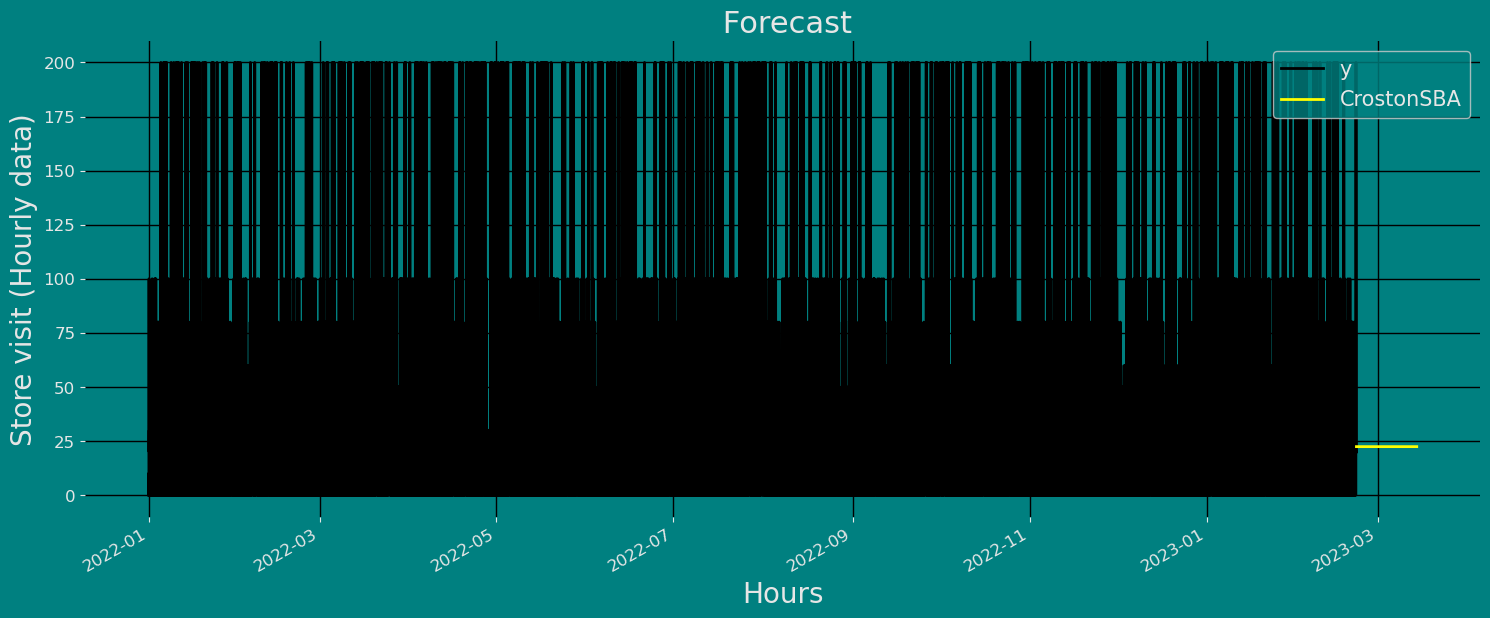

In [28]:
# Merge the forecasts with the true values

fig, ax = plt.subplots(1, 1)
plot_df = pd.concat([df, Y_hat1]).set_index('ds')
plot_df['y'].plot(ax=ax, linewidth=2)
plot_df["CrostonSBA"].plot(ax=ax, linewidth=2, color="yellow")
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel("Store visit (Hourly data)", fontsize=20)
ax.set_xlabel('Hours', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid(True)

## **7.5 Predict method with confidence interval**

To generate forecasts use the predict method.

The predict method takes two arguments: forecasts the next `h` (for horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 500 hours ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [29]:
forecast_df = sf.predict(h=horizon) 

forecast_df

ds  CrostonSBA
unique_id                                
1         2023-02-21 16:00:00   22.426361
1         2023-02-21 17:00:00   22.426361
1         2023-02-21 18:00:00   22.426361
1         2023-02-21 19:00:00   22.426361
1         2023-02-21 20:00:00   22.426361
...                       ...         ...
1         2023-03-14 07:00:00   22.426361
1         2023-03-14 08:00:00   22.426361
1         2023-03-14 09:00:00   22.426361
1         2023-03-14 10:00:00   22.426361
1         2023-03-14 11:00:00   22.426361

[500 rows x 2 columns]

We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [30]:
pd.concat([df, forecast_df]).set_index('ds')

y unique_id  CrostonSBA
ds                                              
2022-01-01 00:00:00    0.0         1         NaN
2022-01-01 01:00:00   10.0         1         NaN
2022-01-01 02:00:00    0.0         1         NaN
2022-01-01 03:00:00    0.0         1         NaN
2022-01-01 04:00:00  100.0         1         NaN
...                    ...       ...         ...
2023-03-14 07:00:00    NaN       NaN   22.426361
2023-03-14 08:00:00    NaN       NaN   22.426361
2023-03-14 09:00:00    NaN       NaN   22.426361
2023-03-14 10:00:00    NaN       NaN   22.426361
2023-03-14 11:00:00    NaN       NaN   22.426361

[10500 rows x 3 columns]

In [31]:
df_plot= pd.concat([df, forecast_df]).set_index('ds').tail(5000)
df_plot

y unique_id  CrostonSBA
ds                                              
2022-08-18 04:00:00    0.0         1         NaN
2022-08-18 05:00:00   80.0         1         NaN
2022-08-18 06:00:00    0.0         1         NaN
2022-08-18 07:00:00  100.0         1         NaN
2022-08-18 08:00:00    0.0         1         NaN
...                    ...       ...         ...
2023-03-14 07:00:00    NaN       NaN   22.426361
2023-03-14 08:00:00    NaN       NaN   22.426361
2023-03-14 09:00:00    NaN       NaN   22.426361
2023-03-14 10:00:00    NaN       NaN   22.426361
2023-03-14 11:00:00    NaN       NaN   22.426361

[5000 rows x 3 columns]

Now let's visualize the result of our forecast and the historical data of our time series.

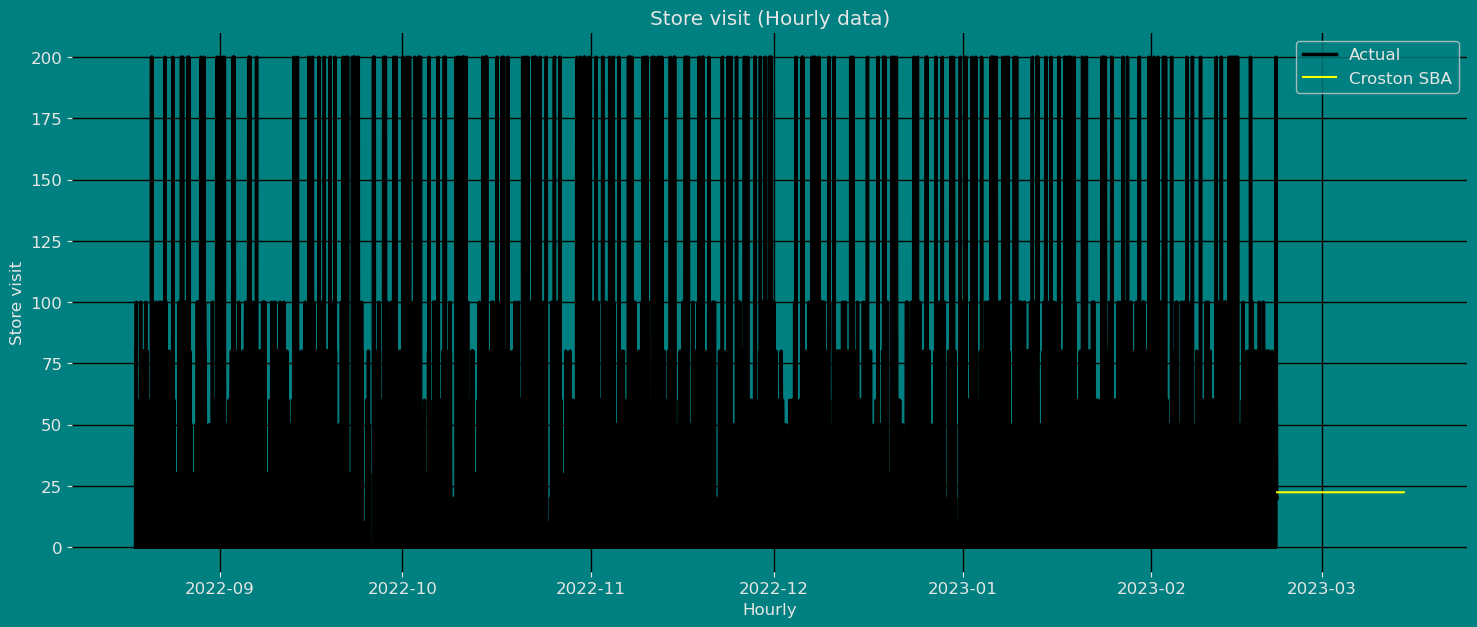

In [32]:
plt.plot(df_plot['y'],label="Actual", linewidth=2.5)
plt.plot(df_plot['CrostonSBA'], label="Croston SBA", color="yellow") # '-', '--', '-.', ':',

plt.title("Store visit (Hourly data)");
plt.xlabel("Hourly")
plt.ylabel("Store visit")
plt.legend()
plt.show();

Let's plot the same graph using the plot function that comes in `Statsforecast`, as shown below.

In [33]:
sf.plot(df, forecast_df)

# **8. Evaluate the model’s performance** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In previous steps, we’ve taken our historical data to predict the future. However, to asses its accuracy we would also like to know how the model would have performed in the past. To assess the accuracy and robustness of your models on your data perform Cross-Validation.

With time series data, Cross Validation is done by defining a sliding window across the historical data and predicting the period following it. This form of cross-validation allows us to arrive at a better estimation of our model’s predictive abilities across a wider range of temporal instances while also keeping the data in the training set contiguous as is required by our models.

The following graph depicts such a Cross Validation Strategy:

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

## **8.1 Perform time series cross-validation**

Cross-validation of time series models is considered a best practice but most implementations are very slow. The statsforecast library implements cross-validation as a distributed operation, making the process less time-consuming to perform. If you have big datasets you can also perform Cross Validation in a distributed cluster using Ray, Dask or Spark.

In this case, we want to evaluate the performance of each model for the last 5 months `(n_windows=)`, forecasting every second months `(step_size=50)`. Depending on your computer, this step should take around 1 min.

The cross_validation method from the StatsForecast class takes the following arguments.

* `df:` training data frame

* `h (int):` represents h steps into the future that are being forecasted. In this case, 500 hours ahead.

* `step_size (int):` step size between each window. In other words: how often do you want to run the forecasting processes.

* `n_windows(int):` number of windows used for cross validation. In other words: what number of forecasting processes in the past do you want to evaluate.

In [34]:
crossvalidation_df = sf.cross_validation(df=df,
                                         h=horizon,
                                         step_size=50,
                                         n_windows=5)

The crossvaldation_df object is a new data frame that includes the following columns:

* `unique_id:` index. If you dont like working with index just run `crossvalidation_df.resetindex()`.
* `ds:` datestamp or temporal index
* `cutoff:` the last datestamp or temporal index for the `n_windows`.
* `y:` true value
* `model:` columns with the model’s name and fitted value.

In [35]:
crossvalidation_df

ds              cutoff      y  CrostonSBA
unique_id                                                           
1         2023-01-23 12:00:00 2023-01-23 11:00:00    0.0   22.473040
1         2023-01-23 13:00:00 2023-01-23 11:00:00    0.0   22.473040
1         2023-01-23 14:00:00 2023-01-23 11:00:00    0.0   22.473040
1         2023-01-23 15:00:00 2023-01-23 11:00:00   60.0   22.473040
1         2023-01-23 16:00:00 2023-01-23 11:00:00    0.0   22.473040
...                       ...                 ...    ...         ...
1         2023-02-21 11:00:00 2023-01-31 19:00:00    0.0   26.047497
1         2023-02-21 12:00:00 2023-01-31 19:00:00  200.0   26.047497
1         2023-02-21 13:00:00 2023-01-31 19:00:00   60.0   26.047497
1         2023-02-21 14:00:00 2023-01-31 19:00:00   20.0   26.047497
1         2023-02-21 15:00:00 2023-01-31 19:00:00   20.0   26.047497

[2500 rows x 4 columns]

We’ll now plot the forecast for each cutoff period. To make the plots clearer, we’ll rename the actual values in each period.

In [36]:
cross_validation=crossvalidation_df.copy()
cross_validation.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 

cutoff = cross_validation['cutoff'].unique()

for k in range(len(cutoff)): 
    cv = cross_validation[cross_validation['cutoff'] == cutoff[k]]
    StatsForecast.plot(df, cv.loc[:, cv.columns != 'cutoff'])

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

We can now compute the accuracy of the forecast using an appropiate accuracy metric. Here we’ll use the Root Mean Squared Error (RMSE). To do this, we first need to `install datasetsforecast`, a Python library developed **by Nixtla** that includes a function to compute the RMSE.

`pip install datasetsforecast`

In [37]:
from datasetsforecast.losses import rmse

The function to compute the RMSE takes two arguments:

1. The actual values.
2. The forecasts, in this case, `Croston SBA Model`.

In [38]:
rmse = rmse(cross_validation['actual'], cross_validation["CrostonSBA"])
print("RMSE using cross-validation: ", rmse)

RMSE using cross-validation:  47.809525


# **10. References** <a class="anchor" id="10"></a>

[Table of Contents](#0)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#arch-model).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).